## Project: Asheville, NC AirBnB Data

In [2]:
#import libraries

import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import file(s)
df=pd.read_csv("data/listings.csv")

In [4]:
df

id                                               name  \
0     1.080610e+05  Walk to stores/parks/downtown. Fenced yard/Pet...   
1     1.553050e+05                 Cottage! BonPaul + Sharky's Hostel   
2     1.568050e+05                  Private Room "Ader" at BPS Hostel   
3     1.569260e+05             Mixed Dorm "Top Bunk #1" at BPS Hostel   
4     1.972630e+05                       Tranquil Room & Private Bath   
...            ...                                                ...   
3004  7.131720e+17        Quiet attic rooms with partial mini kitchen   
3005  7.136020e+17  Treetop Lodge! Great Views| 10 Min to DTown AV...   
3006  7.143780e+17  French Broad Sunset: Phenomenal views, privacy...   
3007  7.145240e+17                    Everything in walking distance!   
3008  7.151150e+17                   The Hidden Gem in Asheville, NC.   

        host_id             host_name  neighbourhood_group  neighbourhood  \
0        320564                  Lisa                  NaN          28801   
1        746673               BonPaul                  NaN          28806   
2        746673               BonPaul                  NaN          28806   
3        746673               BonPaul                  NaN          28806   
4        961396                  Timo                  NaN          28806   
...         ...                   ...                  ...            ...   
3004   35276523                  Andi                  NaN          28806   
3005  317361086  Jeremy And Stephanie                  NaN          28803   
3006   96187307                Yonder                  NaN          28804   
3007  218966482                   Dan                  NaN          28806   
3008  216246091                 David                  NaN          28806   

      latitude  longitude        room_type  price  minimum_nights  \
0     35.60670  -82.55563  Entire home/apt    120              30   
1     35.57864  -82.59578  Entire home/apt    100               1   
2     35.57864  -82.59578     Private room     66               1   
3     35.57864  -82.59578      Shared room     30               1   
4     35.57808  -82.63689     Private room     45               2   
...        ...        ...              ...    ...             ...   
3004  35.57098  -82.58559     Private room     50              30   
3005  35.55640  -82.47490  Entire home/apt    191               2   
3006  35.65092  -82.58904  Entire home/apt    652               1   
3007  35.50758  -82.60044     Private room     52               2   
3008  35.61023  -82.58109  Entire home/apt    124               3   

      number_of_reviews last_review  reviews_per_month  \
0                    90    12/19/21               0.67   
1                   369     8/30/22               2.72   
2                    67      1/1/20               0.50   
3                   315     8/23/22               2.34   
4                    60     8/21/22               0.49   
...                 ...         ...                ...   
3004                  0         NaN                NaN   
3005                  0         NaN                NaN   
3006                  0         NaN                NaN   
3007                  0         NaN                NaN   
3008                  0         NaN                NaN   

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                                  2               310                      1   
1                                  7                84                     35   
2                                  7                 0                      0   
3                                  7               106                     26   
4                                  2                70                     22   
...                              ...               ...                    ...   
3004                               3               233                      0   
3005                               1    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3009 non-null   float64
 1   name                            3009 non-null   object 
 2   host_id                         3009 non-null   int64  
 3   host_name                       3009 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   3009 non-null   int64  
 6   latitude                        3009 non-null   float64
 7   longitude                       3009 non-null   float64
 8   room_type                       3009 non-null   object 
 9   price                           3009 non-null   int64  
 10  minimum_nights                  3009 non-null   int64  
 11  number_of_reviews               3009 non-null   int64  
 12  last_review                     28

In [6]:
#create another dataframe after dropping columns 'neighbourhood_group', 'number_of_reviews', 'reviews_per_month', and 'license' 
#since they won't be relevant to my story

df2 = df.drop(columns = ['neighbourhood_group', 'number_of_reviews', 'reviews_per_month', 'license'])

In [7]:
df2.head()

id                                               name  host_id  \
0  108061.0  Walk to stores/parks/downtown. Fenced yard/Pet...   320564   
1  155305.0                 Cottage! BonPaul + Sharky's Hostel   746673   
2  156805.0                  Private Room "Ader" at BPS Hostel   746673   
3  156926.0             Mixed Dorm "Top Bunk #1" at BPS Hostel   746673   
4  197263.0                       Tranquil Room & Private Bath   961396   

  host_name  neighbourhood  latitude  longitude        room_type  price  \
0      Lisa          28801  35.60670  -82.55563  Entire home/apt    120   
1   BonPaul          28806  35.57864  -82.59578  Entire home/apt    100   
2   BonPaul          28806  35.57864  -82.59578     Private room     66   
3   BonPaul          28806  35.57864  -82.59578      Shared room     30   
4      Timo          28806  35.57808  -82.63689     Private room     45   

   minimum_nights last_review  calculated_host_listings_count  \
0              30    12/19/21                               2   
1               1     8/30/22                               7   
2               1      1/1/20                               7   
3               1     8/23/22                               7   
4               2     8/21/22                               2   

   availability_365  number_of_reviews_ltm  
0               310                      1  
1                84                     35  
2                 0                      0  
3               106                     26  
4                70                     22

In [8]:
print(df2.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights', 'last_review',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3009 non-null   float64
 1   name                            3009 non-null   object 
 2   host_id                         3009 non-null   int64  
 3   host_name                       3009 non-null   object 
 4   neighbourhood                   3009 non-null   int64  
 5   latitude                        3009 non-null   float64
 6   longitude                       3009 non-null   float64
 7   room_type                       3009 non-null   object 
 8   price                           3009 non-null   int64  
 9   minimum_nights                  3009 non-null   int64  
 10  last_review                     2817 non-null   object 
 11  calculated_host_listings_count  3009 non-null   int64  
 12  availability_365                30

In [10]:
df2.describe()

id       host_id  neighbourhood     latitude    longitude  \
count  3.009000e+03  3.009000e+03    3009.000000  3009.000000  3009.000000   
mean   1.062761e+17  1.343454e+08   28792.099369    35.576081   -82.559896   
std    2.360050e+17  1.317033e+08      30.993186     0.050084     0.048622   
min    1.080610e+05  6.266700e+04   28704.000000    35.422810   -82.691050   
25%    2.364448e+07  2.497795e+07   28801.000000    35.560750   -82.594230   
50%    4.094698e+07  9.618731e+07   28804.000000    35.587480   -82.558350   
75%    5.201129e+07  1.897998e+08   28806.000000    35.606060   -82.524340   
max    7.151150e+17  4.788489e+08   28806.000000    35.656090   -82.459420   

             price  minimum_nights  calculated_host_listings_count  \
count  3009.000000     3009.000000                     3009.000000   
mean    182.778664        5.254902                        8.722832   
std     159.617091       14.978303                       23.338049   
min      19.000000        1.000000                        1.000000   
25%      98.000000        1.000000                        1.000000   
50%     138.000000        2.000000                        2.000000   
75%     214.000000        2.000000                        4.000000   
max    2142.000000      365.000000                      117.000000   

       availability_365  number_of_reviews_ltm  
count       3009.000000            3009.000000  
mean         199.924892              25.753074  
std          122.459846              28.020281  
min            0.000000               0.000000  
25%           83.000000               4.000000  
50%          218.000000              17.000000  
75%          317.000000              38.000000  
max          365.000000             236.000000

In [11]:
df2.shape

(3009, 14)

In [12]:
df2.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights', 'last_review',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [13]:
df2.isnull().sum()

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
last_review                       192
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
dtype: int64

In [14]:
# Total Listings By Zip Code

total_listings = df2.groupby("neighbourhood")["calculated_host_listings_count"].count()
print(total_listings)

neighbourhood
28704    217
28715     91
28732     80
28801    640
28803    408
28804    390
28805    288
28806    895
Name: calculated_host_listings_count, dtype: int64


In [18]:
#total listings per host by 'host_id', 'host_name', and count of 'id'.

total_host_listings = df.groupby(["host_id", "host_name"])["id"].count()
type(total_host_listings)

total_host_listings = pd.DataFrame(total_host_listings)
total_host_listings.reset_index()

host_id host_name  id
0         62667   Heather   3
1         78354     Kacey   1
2        167473     Kelly   2
3        168588       Bee   1
4        183656       Kim   1
...         ...       ...  ..
1908  477251437     Tyler   4
1909  477404819      John   4
1910  477571285     Brian   1
1911  478724866   Michael   1
1912  478848912      Pete   1

[1913 rows x 3 columns]

In [19]:
#Searching for the highest priced rental per night. Something strange about this one. 

df2.loc[df2['price']==df2['price'].max()]

id                                          name    host_id  \
2783  6.353440e+17  Luxury Penthouse Suite in Downtown Asheville  461050060   

     host_name  neighbourhood   latitude  longitude     room_type  price  \
2783     Jason          28801  35.596668 -82.558449  Private room   2142   

      minimum_nights last_review  calculated_host_listings_count  \
2783               2         NaN                               1   

      availability_365  number_of_reviews_ltm  
2783               178                      0

In [23]:
#Total Host Listing as DataFrame
#Top 10 Total Listings
total_host_listings.sort_values(by='id', ascending=False)#.reset_index()
total_host_listings['id'].nlargest(n=10).reset_index()


#total_host_listings.rename(columns={'id': 'total_listings'})

host_id              host_name   id
0  167186184                  Towns  117
1   96187307                 Yonder   54
2  134903005      Carolina Mornings   29
3  121681645                 Evolve   28
4  443139360  Vacasa North Carolina   22
5  151279507       Bobby And Amanda   19
6  151397468                 Evolve   19
7  242474849      Jennifer And Erik   16
8  250328755   River Row Flats, Inc   15
9  231291927       Tiny House Farms   13

In [25]:
#Looking at the listing types and prices ranges of 'Towns' properties.  

df2.loc[df2['calculated_host_listings_count']==df2['calculated_host_listings_count'].max()]

id                                               name  \
1047  3.126001e+07  Contemporary South Slope Townhome with Private...   
1049  3.126769e+07              Luxury condo in the heart of downtown   
1050  3.131552e+07  Luxury Condo in Downtown Asheville Condotel Un...   
1051  3.131856e+07  Luxury Condo in Downtown Asheville Condotel Un...   
1052  3.131856e+07  Luxury Condo in Downtown Asheville Condotel Un...   
...            ...                                                ...   
2731  6.187130e+17              Fantastic 2 bed 2 bath downtown condo   
2744  6.253590e+17  Phenomenal 2 Bedroom 2.5 Bathroom Downtown Pro...   
2759  6.288620e+17                             Supreme Downtown Condo   
2769  6.317610e+17  Impressive 2 bed 2.5 bath City Center Condo wi...   
2801  6.411870e+17                  Fabulous Downtown 2 bedroom Condo   

        host_id host_name  neighbourhood  latitude  longitude  \
1047  167186184     Towns          28801  35.58646  -82.55283   
1049  167186184     Towns          28801  35.59167  -82.55601   
1050  167186184     Towns          28801  35.59282  -82.55754   
1051  167186184     Towns          28801  35.59343  -82.55715   
1052  167186184     Towns          28801  35.59142  -82.55564   
...         ...       ...            ...       ...        ...   
2731  167186184     Towns          28801  35.59745  -82.55070   
2744  167186184     Towns          28801  35.59696  -82.55245   
2759  167186184     Towns          28801  35.58938  -82.55278   
2769  167186184     Towns          28801  35.59598  -82.55172   
2801  167186184     Towns          28801  35.59546  -82.55257   

            room_type  price  minimum_nights last_review  \
1047  Entire home/apt    452               1     8/14/22   
1049  Entire home/apt    181               1     8/29/22   
1050  Entire home/apt    581               1     8/28/22   
1051  Entire home/apt    252               1     8/23/22   
1052  Entire home/apt    281               1     8/19/22   
...               ...    ...             ...         ...   
2731  Entire home/apt    281               1     8/10/22   
2744  Entire home/apt    395               1     8/21/22   
2759  Entire home/apt    395               1     8/12/22   
2769  Entire home/apt    281               1     8/29/22   
2801  Entire home/apt    281               1     8/28/22   

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  
1047                             117                 0                     21  
1049                             117               338                     29  
1050                             117               312                     15  
1051                             117               317                     25  
1052                             117               346                     19  
...                              ...               ...                    ...  
2731                             117               267                      7  
2744                             117               325                      9  
2759                             117               339                      9  
2769                             117               297                      9  
2801                             117               304                     11  

[117 rows x 14 columns]

In [18]:
#Top 10 largest Minimum Night stays

top_10minstay = df2['minimum_nights'].nlargest(n=10)
top_10minstay

1715    365
2157    365
2160    365
66      180
88      120
71       90
113      90
2686     90
65       60
124      60
Name: minimum_nights, dtype: int64

In [26]:
df2.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights', 'last_review',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [27]:
df2[["host_name", "calculated_host_listings_count", 'availability_365' ]].head()

host_name  calculated_host_listings_count  availability_365
0      Lisa                               2               310
1   BonPaul                               7                84
2   BonPaul                               7                 0
3   BonPaul                               7               106
4      Timo                               2                70

In [29]:
most_listings = df2['calculated_host_listings_count'].nlargest(n=10)
most_listings

1047    117
1049    117
1050    117
1051    117
1052    117
1053    117
1054    117
1055    117
1056    117
1057    117
Name: calculated_host_listings_count, dtype: int64

In [31]:
# Pivot table to check for Median Price by Neighbourhood

pivot_df = pd.pivot_table(df2,index='neighbourhood', values='price', aggfunc='median')



In [32]:
pivot_df

price
neighbourhood       
28704          130.0
28715          130.0
28732          141.0
28801          177.0
28803          134.5
28804          153.5
28805          135.5
28806          120.0

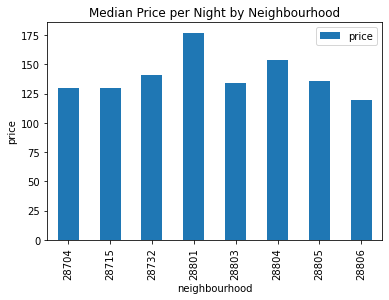

In [33]:
pivot_df.plot(kind = 'bar')
plt.ylabel('price')
plt.title('Median Price per Night by Neighbourhood')
plt.legend()
plt.show()

#Graph shows that median price 

<AxesSubplot:ylabel='neighbourhood'>

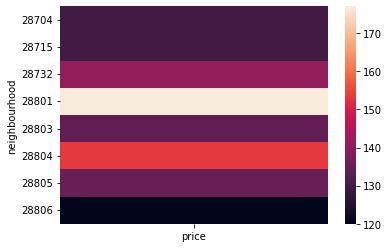

In [34]:
sns.heatmap(pivot_df)

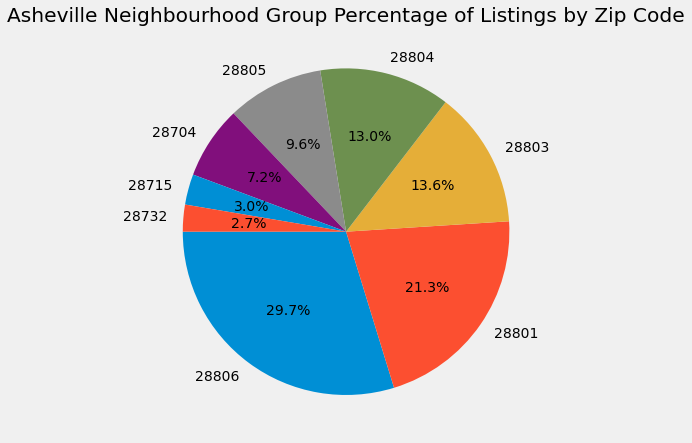

In [35]:
#Pie Plot of what neighbourhoods(by zip code) hold the most listings

plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Asheville Neighbourhood Group Percentage of Listings by Zip Code")
g = plt.pie(df2.neighbourhood.value_counts(), labels=df2.neighbourhood.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

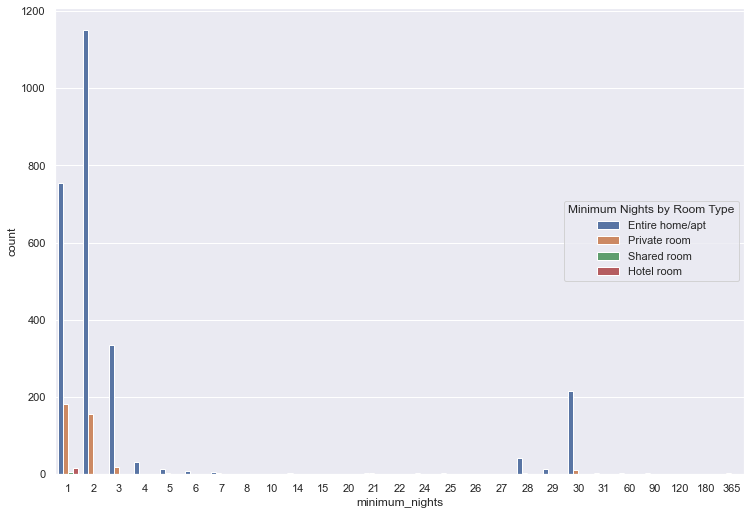

In [36]:
#The 30 day minimum night stay seems to be the threshold. 

sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(x='minimum_nights', hue = 'room_type', data=df2)
plt.legend(loc='center right', title='Minimum Nights by Room Type')
#median = df2['price'].median()


In [38]:
corr_dataframe = df2[['minimum_nights', 'price', 'number_of_reviews_ltm']].corr()
corr_dataframe


minimum_nights     price  number_of_reviews_ltm
minimum_nights               1.000000 -0.090709              -0.194268
price                       -0.090709  1.000000              -0.160839
number_of_reviews_ltm       -0.194268 -0.160839               1.000000

<AxesSubplot:>

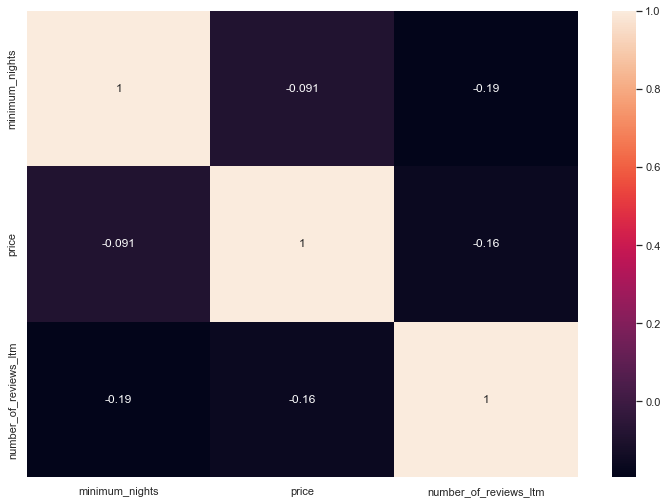

In [39]:
#Not a lot of correlation between these categories

sns.heatmap(corr_dataframe, annot=True)

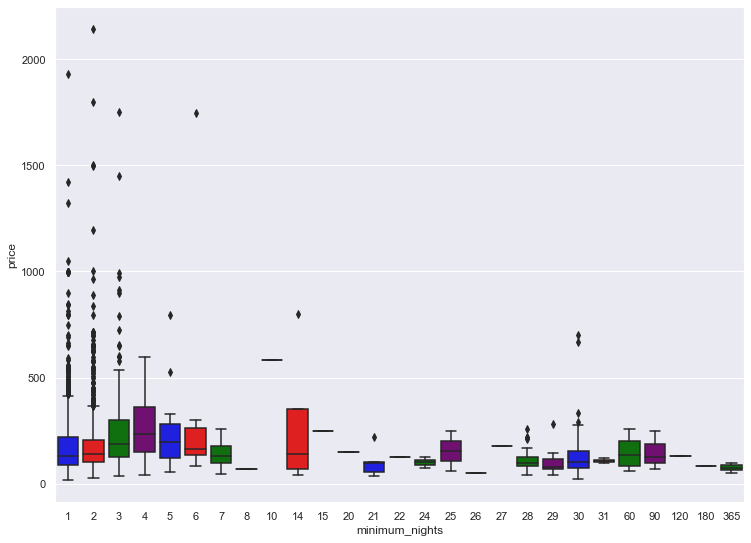

In [40]:
#Price is too skewed because of outliers

sns.set(rc={'figure.figsize': (11, 8.5)}) #This sets the size of your graphs so you can read them
ax = sns.boxplot(x = 'minimum_nights', y = 'price', data = df2, palette = ['blue', 'red', 'green', 'purple'])

In [41]:
df2.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights', 'last_review',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/m5/wbtdjthn5rv887p1fsc17kqc0000gn/T/ipykernel_1711/1003157218.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


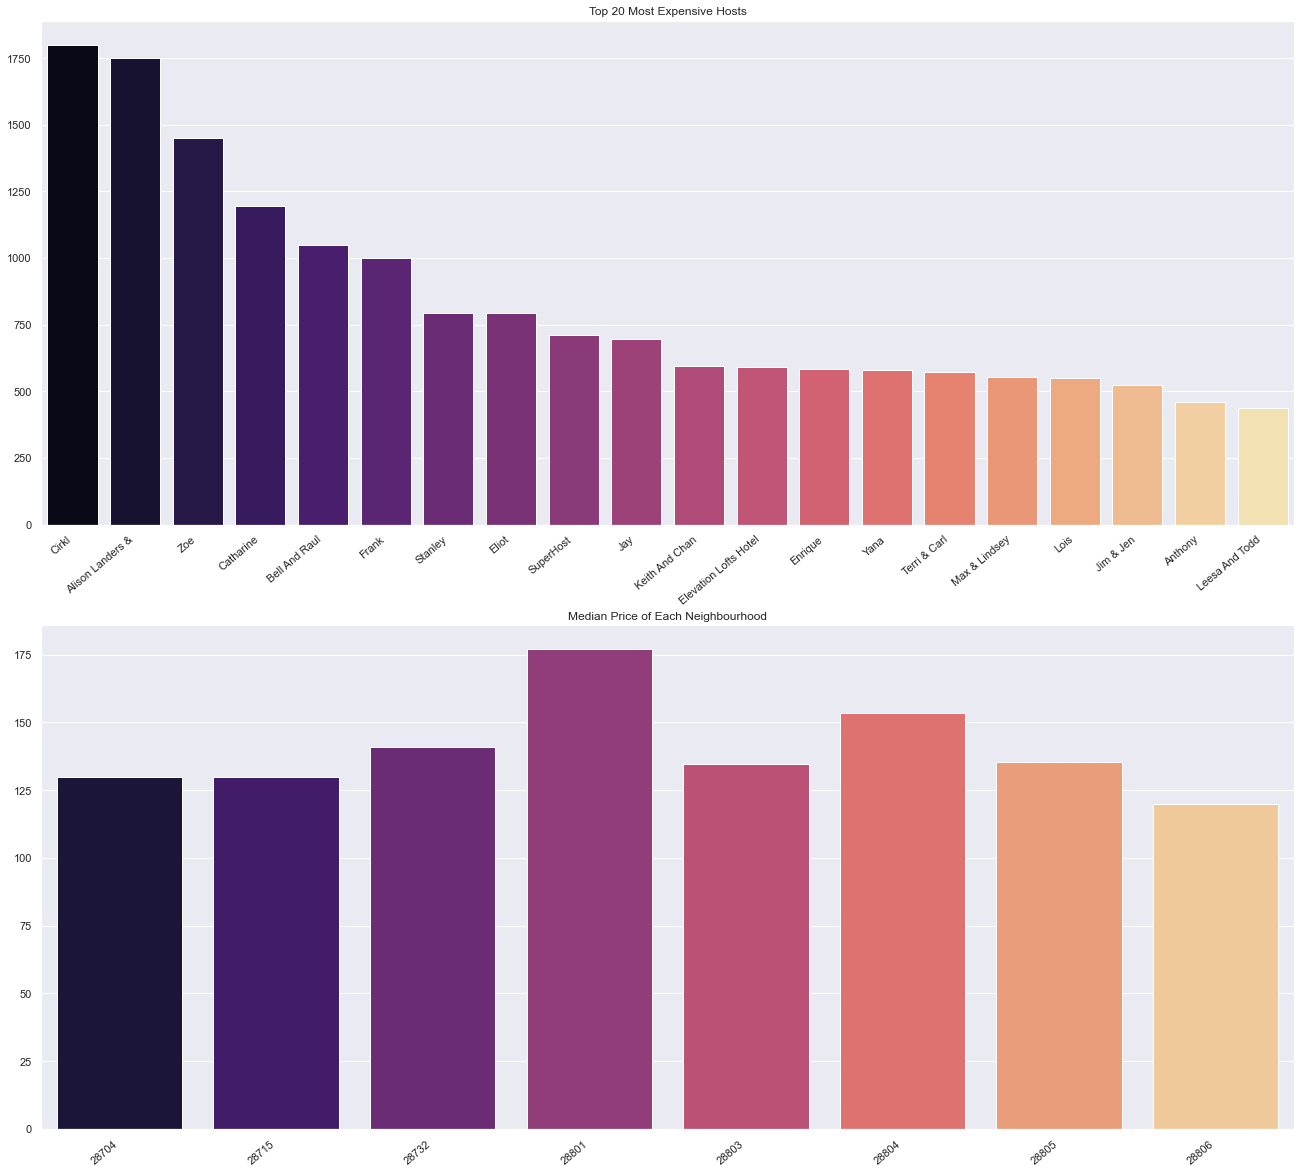

In [44]:
#Sorting most expensive hosts and median price of each neighbourhood
#Need to understand why Neighbourhood/Price graph isn't ascending sorting

d = df2.groupby('host_name')['price'].median().sort_values(ascending=False)

fig, ax= plt.subplots(2,1, figsize=(20,19))
sns.barplot(d.index.tolist()[:20], d.values[:20], ax=ax[0], palette=('magma'))
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].set_title('Top 20 Most Expensive Hosts')

d = df2.groupby('neighbourhood')['price'].median().sort_values(ascending=False)[:8]
sns.barplot(d.index.tolist(), d.values, ax=ax[1], palette=('magma'))
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
ax[1].set_title('Median Price of Each Neighbourhood')

fig.show()

#plt.savefig('data/exp_hosts.png')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/var/folders/m5/wbtdjthn5rv887p1fsc17kqc0000gn/T/ipykernel_1711/2443433512.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


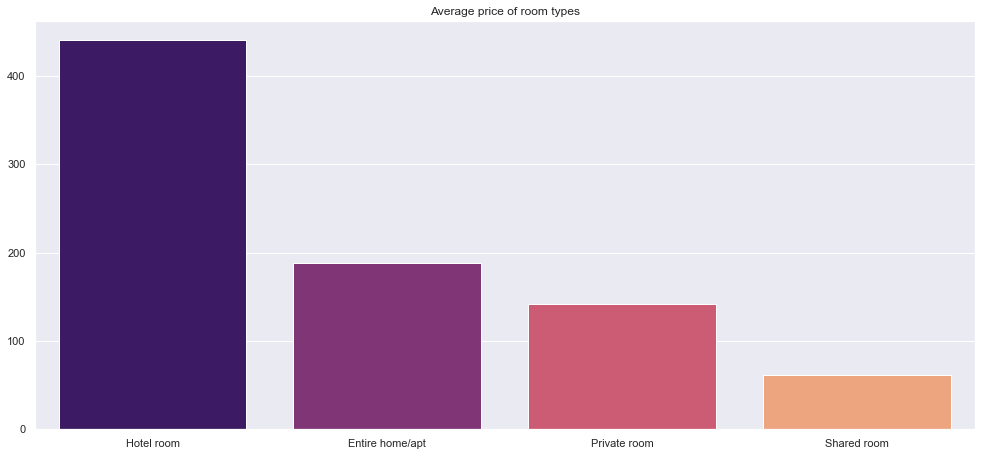

In [46]:
#groupby and sorting room types by average price

d = df2.groupby('room_type')['price'].mean().sort_values(ascending=False)
fig, ax= plt.subplots(figsize=(15,7))
sns.barplot(d.index.tolist(), d.values, ax=ax, palette = 'magma')
ax.set_title('Average price of room types')
fig.show()

In [ ]:
#df2["last_review"] = pd.to_datetime(pd.Series(df2["last_review"]))

In [47]:
d = df2[df2['minimum_nights'] <= 30].groupby('minimum_nights')['room_type'].count()

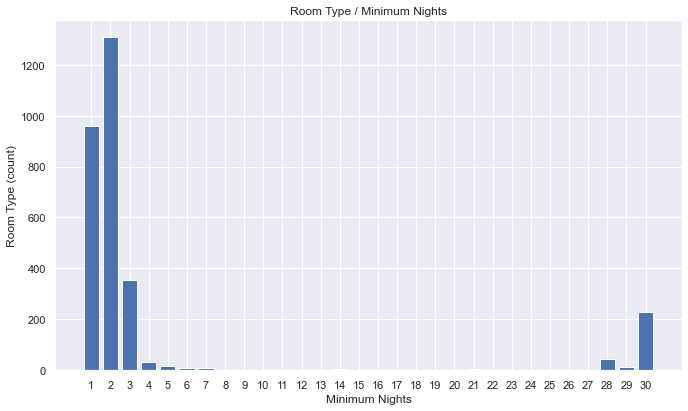

In [49]:
#Count of Room type by Minimum Nights

fig = plt.figure(figsize=(10,6))
plt.xticks(np.arange(min(d.keys().tolist()), max(d.keys().tolist())+1, 1.0))
plt.bar(d.keys().tolist(), d.tolist())
plt.title('Room Type / Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Room Type (count)')
plt.grid(True)

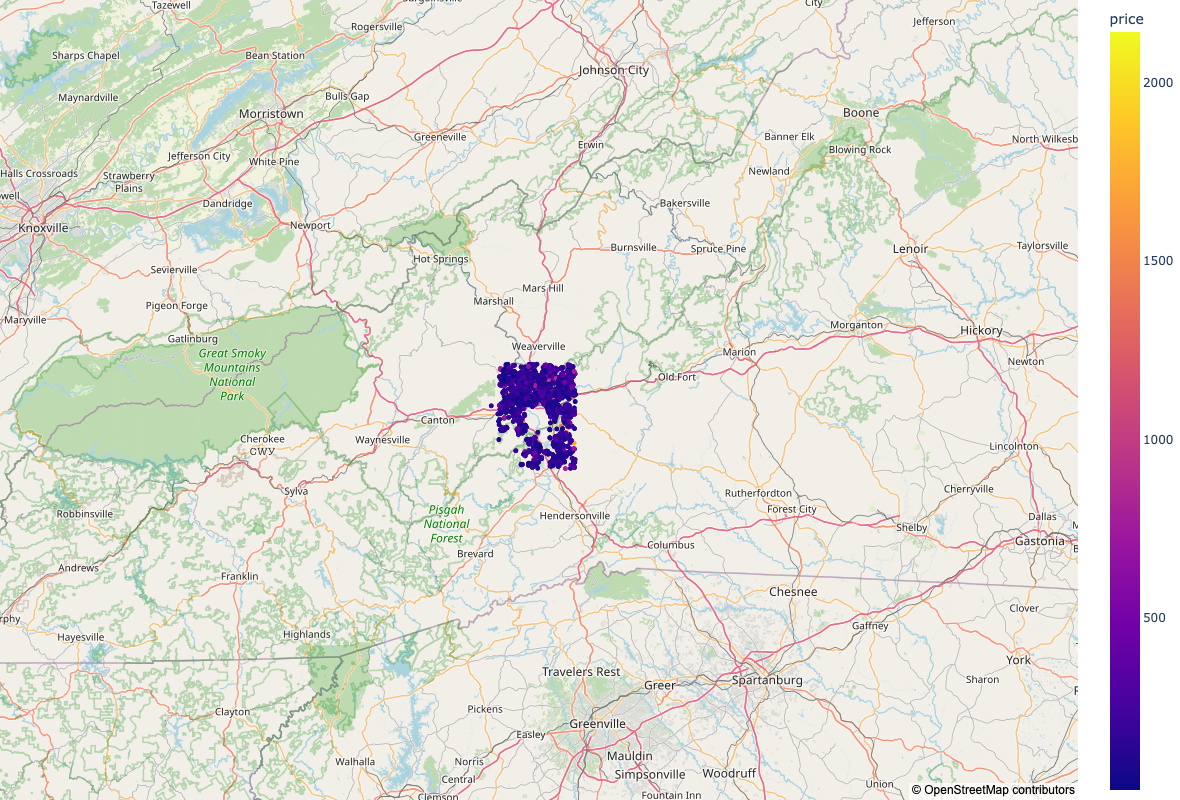

In [50]:
#Interactive map of all Asheville AirBnB Listings. 
#The Darker the color, the lower the price.
#Most of the higher priced listings are within the city limits. 
#The majority of listings are affordable. 

import plotly.express as px

#df2.dropna(
    #axis=0,
    #how='any',
    #thresh=None,
    #subset=None,
    #inplace=True
#)

color_scale = [(0, 'blue'), (1,'purple')]
fig = px.scatter_mapbox(df2,
                        lat="latitude",
                        lon="longitude",
                        hover_name="neighbourhood",
                        hover_data=["name", "host_name", "price", "room_type", "minimum_nights"],
                        color="price",
                        zoom=8,
                        height=800,
                        width=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
                                    
                                    #neighbourhood", "host_name", "price", "minimum_nights"